<a href="https://colab.research.google.com/github/keelinarseneault/ML-Engineering/blob/main/Capstone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
train_path = '/Users/karseneault/Desktop/train_data/'
test_path = '/Users/karseneault/Desktop/test_data_v2/'

In [3]:
train = pd.read_csv('capstone/train.csv')
test = pd.read_csv('capstone/test.csv')

In [4]:
train.head()

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


In [5]:
test.head()

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [6]:
print(f'Training dataset shape: {train.shape}')

train = train[['file_name', 'label']]
train.columns = ['id', 'label']

Training dataset shape: (79950, 3)


In [7]:
test.columns

Index(['id'], dtype='object')

In [8]:
# Check size of train and test datasets

print(train.shape)
print(test.shape)

(79950, 2)
(5540, 1)


In [9]:
print(train.value_counts('label'))

label
0    39975
1    39975
Name: count, dtype: int64


**The training dataset is balanced in the amount of fake and real images.**

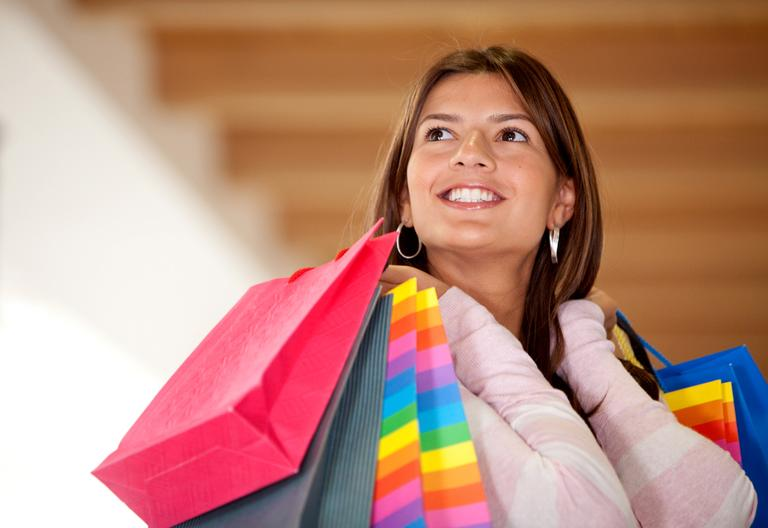

In [10]:
# Open one image to test

from PIL import Image
image = Image.open(train_path+'/09708379751e44d0bc908d8652d0db3e.jpg')
image

In [11]:
# Exploring properties of the images in the training dataset

import numpy as np
import cv2

sizes = []
resolutions = []
color_distributions = []

for dirpath, dirnames, filenames in os.walk(train_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract image size
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract image resolution
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract image color distribution
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

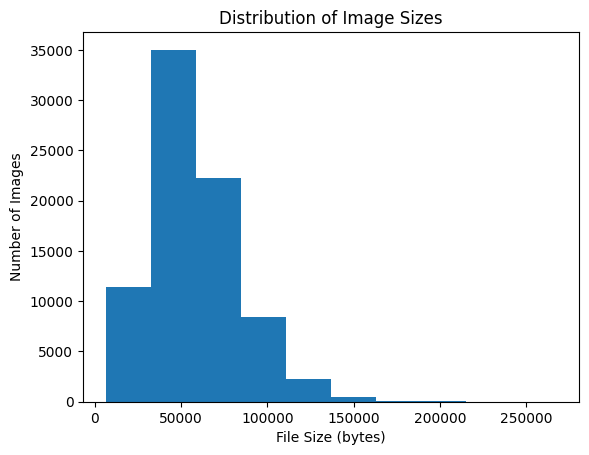

In [12]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

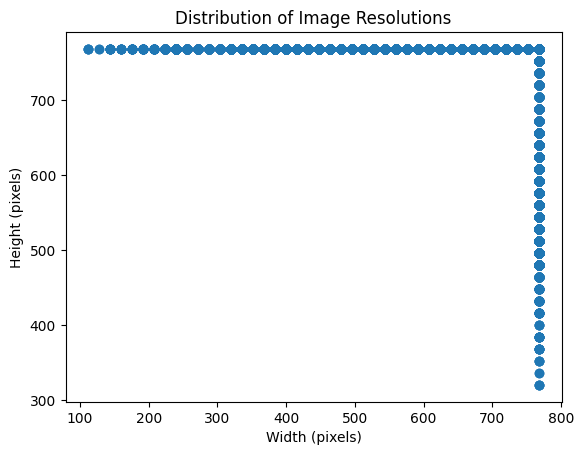

In [13]:
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

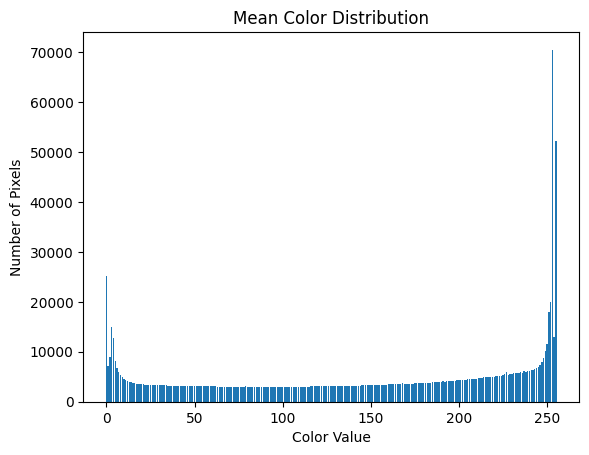

In [14]:
# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

In [24]:
# # Create image preprocessing function

def preprocess_images(path, target_size=(224, 224)):
    for filename in os.listdir(path):
        if filename.endswith((".jpg", ".jpeg", ".png")): 
            file_path = os.path.join(path, filename)
            img = cv2.imread(file_path)
            resize_img = cv2.resize(img, target_size)
            normalize_img = resize_img / 255.0
            return normalize_img

train_images = preprocess_images(train_path)
test_images = preprocess_images(test_path)
